<a href="https://colab.research.google.com/github/Ankita-chouhan-github/Sentiment-Analysis-of-COVID-19-tweets/blob/main/COVID_19_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Description : Sentiment Analysis - Predicting Sentiment of COVID-19 Tweets**
This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:
* Location
* Tweet At
* Original Tweet
* Label

**github link:** https://github.com/Ankita-chouhan-github/Sentiment-Analysis-of-COVID-19-tweets

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Capstone Project/Coronavirus Tweets.csv', encoding = 'latin-1')

In [ ]:
df1 = df.copy()

We have made a copy so that the original dataframe remains same while we perform transformation on the copied dataframe.

In [ ]:
df1.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


There are no Null values present in our dataset

In [ ]:
df1.shape

(41157, 6)

In [ ]:
df1.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

There are 6 columns out of which our target/dependent variable is sentiment

In [ ]:
# for sentiment analysis the two main columns that we require are 'OriginalTweet', 'Sentiment', 'Location' & 'TweetAt'
df_model = df1[['OriginalTweet','Sentiment', 'Location', 'TweetAt']]

In [ ]:
df_model.head()

OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

    Location     TweetAt  
0     London  16-03-2020  
1         UK  16-03-2020  
2  Vagabonds  16-03-2020  
3        NaN  16-03-2020  
4        NaN  16-03-2020

In [ ]:
# Statistical Analysis of datset
df_model.describe()

OriginalTweet Sentiment Location  \
count                                               41157     41157    32567   
unique                                              41157         5    12220   
top     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...  Positive   London   
freq                                                    1     11422      540   

           TweetAt  
count        41157  
unique          30  
top     20-03-2020  
freq          3448

In [ ]:
# Checking unique values in our dataset
df_model.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
#check duplicate entries
len(df_model[df_model.duplicated()])

0

There are no duplicate entries in our dataset

In [ ]:
# Checking null value
df_model.isnull().sum()

OriginalTweet       0
Sentiment           0
Location         8590
TweetAt             0
dtype: int64

In [ ]:
# Checking  missing values in 'Location' column
miss_value = df_model['Location'].isnull().sum()/(df_model.shape[0]) * 100
print("We have {:.2f} % of missing values in 'Location' Column".format(miss_value))


We have 20.87 % of missing values in 'Location' Column


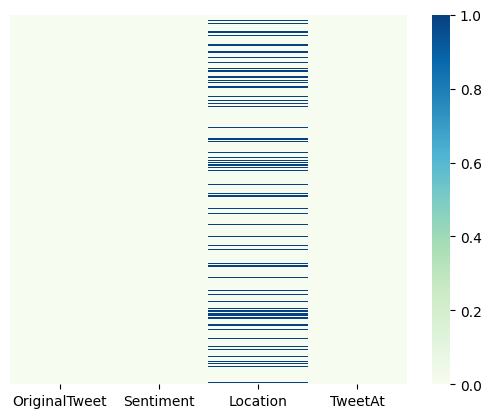

In [ ]:
# Plot for missing values across different columns
missing_graph = sns.heatmap(df_model.isnull(), cbar=True, yticklabels=False, cmap="GnBu")
plt.show()

#**EDA- Exploratory Data Analysis**

**Short Overview:** The original dataset has 6 columns and 41157 rows. In order to analyse various sentiments, We require just only two columns named Original Tweet and Sentiment. There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis. All tweets data collected from the months of March and April 2020. There are various #hashtags in tweets column which we will like to explore.People also have different sentiments about various issues shows us their optimism during pandemic times.

#**1. Location**

In [ ]:
# Looking the count value of different Location
df_model.Location.value_counts().head(20)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
Name: Location, dtype: int64

In [ ]:
# Looking for the unique values in the variable
df_model.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [ ]:
# Describing the Location
df_model.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

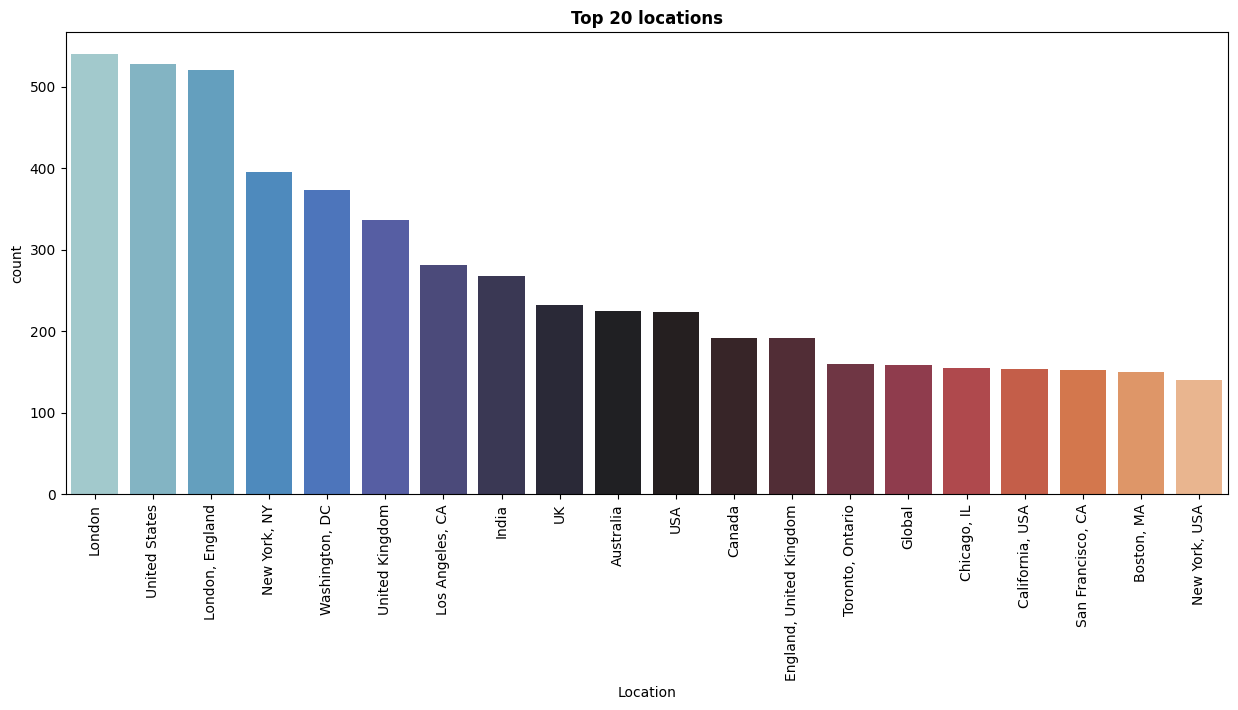

In [ ]:
# Looking for top 15 Countries in Countplot
plt.figure(figsize=(15,6))
sns.countplot(x=df_model.Location, order = df_model.Location.value_counts().iloc[:20].index, palette ='icefire')
plt.title('Top 20 locations', fontweight = 'bold')
plt.xticks(rotation=90, size=10)
plt.show()



1.   The above count plot shows the top 15 locations in the dataset.
2. Plot shows the London to be the maximum among all the different locations.
3. Second place is of United States and India ranks at 8th place.




In [ ]:
# Creating dataframe for location
location = pd.DataFrame(df_model['Location'].value_counts().sort_values(ascending=False))
location = location.rename(columns={'Location':'count'})

In [ ]:
# Importing required library
import plotly.graph_objects as go

In [ ]:
# Plotting the interactive pie plot in percentage of Top 20 locations
data = {
   "values": location['count'][:20],
   "labels": location.index[:20],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Percentage of Location</b>", legend=dict(x=0.1, y=1.0, orientation="v"))
data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()



1.   The above pie plot shows the percentage wise Top 15 locations in the present dataset.
2. Here we can again see London has the maximum percentage share of 10.1%, followed by United States with 9.83% and again London, England with 9.68%.
3. India which is placed at 8th place shares the percentage of 4.99%.




#**2. Tweet Date**

In [ ]:
# Count value of TweetAt (Tweeting date)
df_model['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [ ]:
# Checking unique Tweet dates in TweetAt
df_model.TweetAt.unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [ ]:
# Describing TweetAt
df_model.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

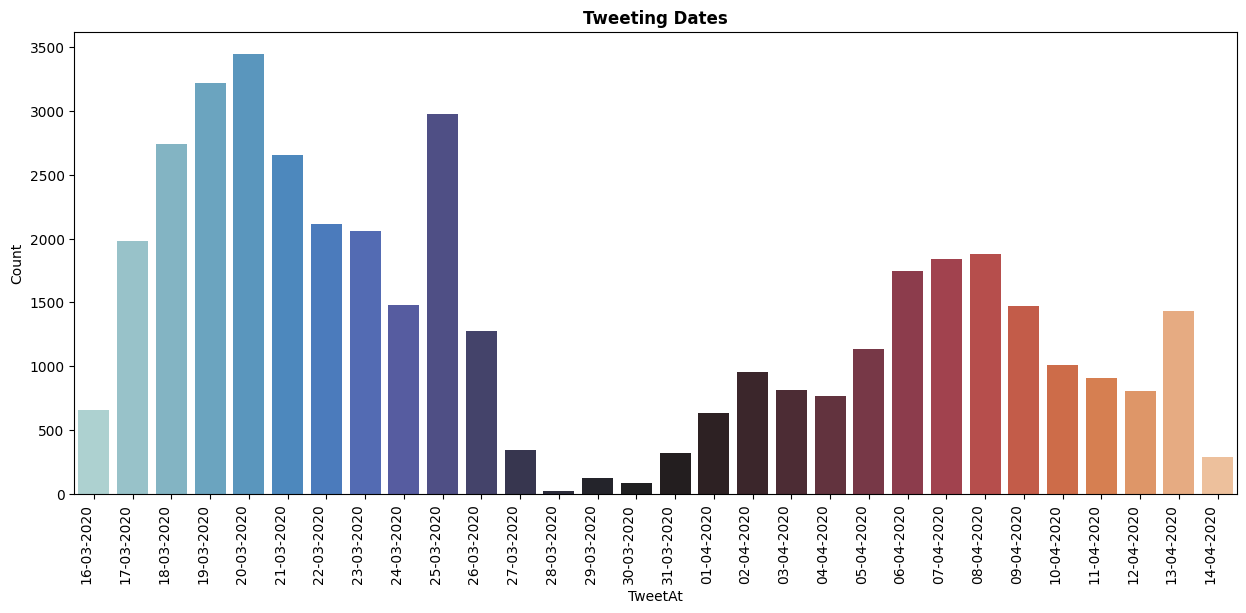

In [ ]:
# Distribution of Dates of Tweets
plt.figure(figsize=(15,6))
sns.countplot(x='TweetAt', data=df_model, palette ='icefire')
plt.xticks(rotation=90, ha='right')
plt.title("Tweeting Dates", fontweight = 'bold')
plt.ylabel("Count", fontsize = 10)
plt.xlabel("TweetAt",fontsize = 10)
plt.show()

1. The above count plot shows the overall distribution of different tweeting dates in the dataset. Starting from the mid-month of March 2020 to mid-month of April 2020.
2. From the we can find out that the date 20-03-2020 has the maximum count value among all the other occuring dates.
3. Least count value is for date 28-03-2020.
4. The tweeting date ranges from 16-03-2020 to 14-04-2020, which is approx 30 days in total.

#**3. Sentiment**

In [ ]:
# Checking unique values in Sentiment
df_model.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
# Describing the sentiments
df_model.Sentiment.describe()

count        41157
unique           5
top       Positive
freq         11422
Name: Sentiment, dtype: object

In [ ]:
# Checking sentiment count value
df_model.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

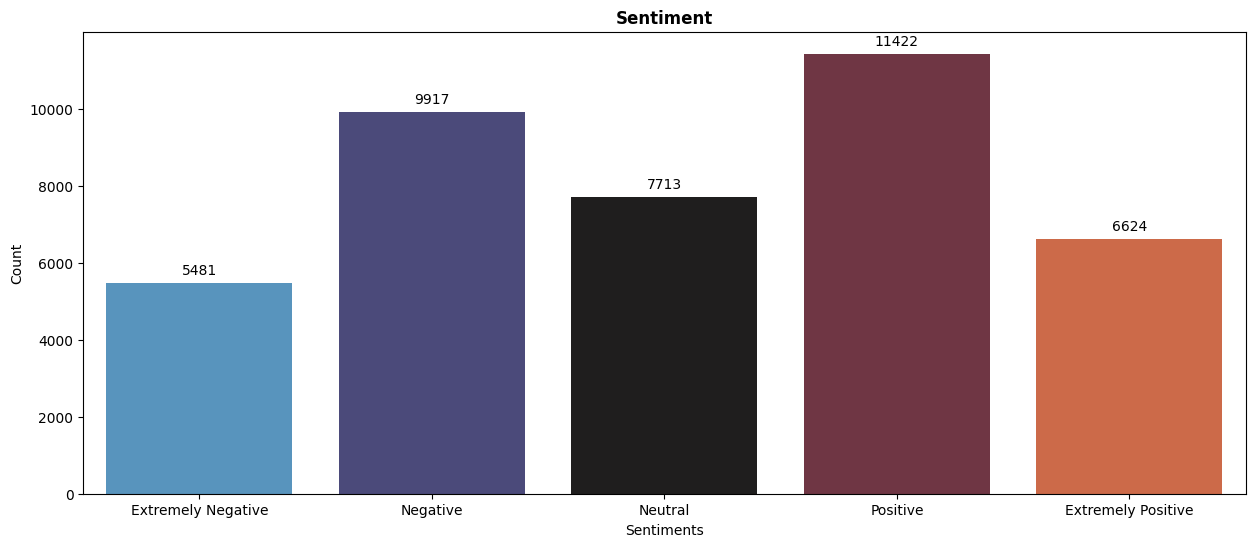

In [ ]:
# Plotting the Sentiments count value as countplot
plt.figure(figsize=(15,6))
splot = sns.countplot(x='Sentiment', data=df_model, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], palette="icefire")
# adding annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title("Sentiment", fontweight = 'bold')
plt.ylabel("Count", fontsize = 10)
plt.xlabel("Sentiments",fontsize = 10)
plt.show()



1.   The above plot is showing the count value of different sentiments present in the dataset.
2. The most common occuring sentiment is positive, followed by negative, neutral, extremely positive and least is extremely negative.




#**Class Distribution of Each Sentiment Type**

In [ ]:
# Copying the dataframe
tt_df = df_model.copy()

In [ ]:
# Creating the new column 'Text'
tt_df['text'] = tt_df.OriginalTweet
tt_df["text"] = tt_df["text"].astype(str)

In [ ]:
# Calculating the text count
class_df = tt_df.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='viridis')

#**Number of characters of each sentiments types**

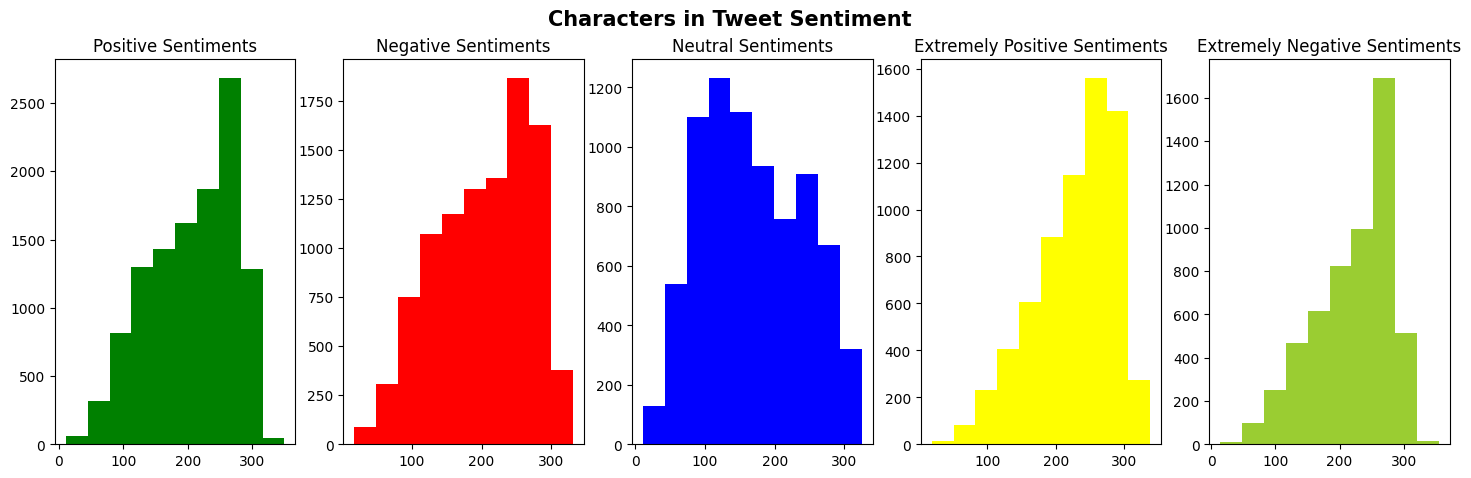

In [ ]:
# Plotting the number of characters for each tweet sentiment types
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(18,5))
tweet_len=tt_df[tt_df['Sentiment']=="Positive"]['text'].str.len()
ax1.hist(tweet_len,color='green')
ax1.set_title('Positive Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Negative"]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Negative Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.len()
ax3.hist(tweet_len,color='blue')
ax3.set_title('Neutral Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.len()
ax4.hist(tweet_len,color='yellow')
ax4.set_title('Extremely Positive Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.len()
ax5.hist(tweet_len,color='yellowgreen')
ax5.set_title('Extremely Negative Sentiments')


fig.suptitle("Characters in Tweet Sentiment", size=15,fontweight="bold")
# Showing the plot
plt.show()

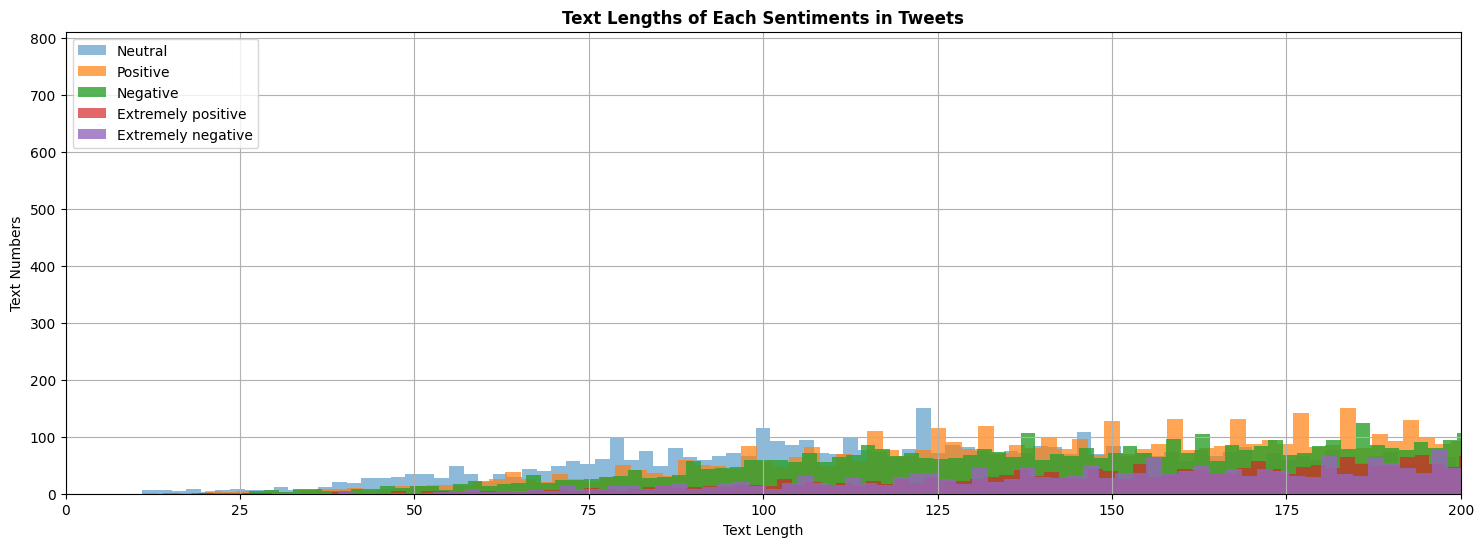

In [ ]:
# Importing required library
from matplotlib.pylab import tile

# Writing the function
def length(text):
    '''a function which returns the length of text'''
    return len(text)
tt_df['length'] = tt_df['text'].apply(length)

plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(tt_df[tt_df['Sentiment'] == "Neutral"]['length'], alpha = 0.5, bins=bins, label='Neutral')
plt.hist(tt_df[tt_df['Sentiment'] == "Positive"]['length'], alpha = 0.7, bins=bins, label='Positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Negative"]['length'], alpha = 0.8, bins=bins, label='Negative')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Positive"]['length'], alpha = 0.7, bins=bins, label='Extremely positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Negative"]['length'], alpha = 0.8, bins=bins, label='Extremely negative')


# Plotting the data
plt.title('Text Lengths of Each Sentiments in Tweets', fontweight='bold')
plt.xlabel('Text Length')
plt.ylabel('Text Numbers')
plt.legend(loc='upper left')
plt.xlim(0,200)
plt.grid()
plt.show()

#**Average word length in a tweet**

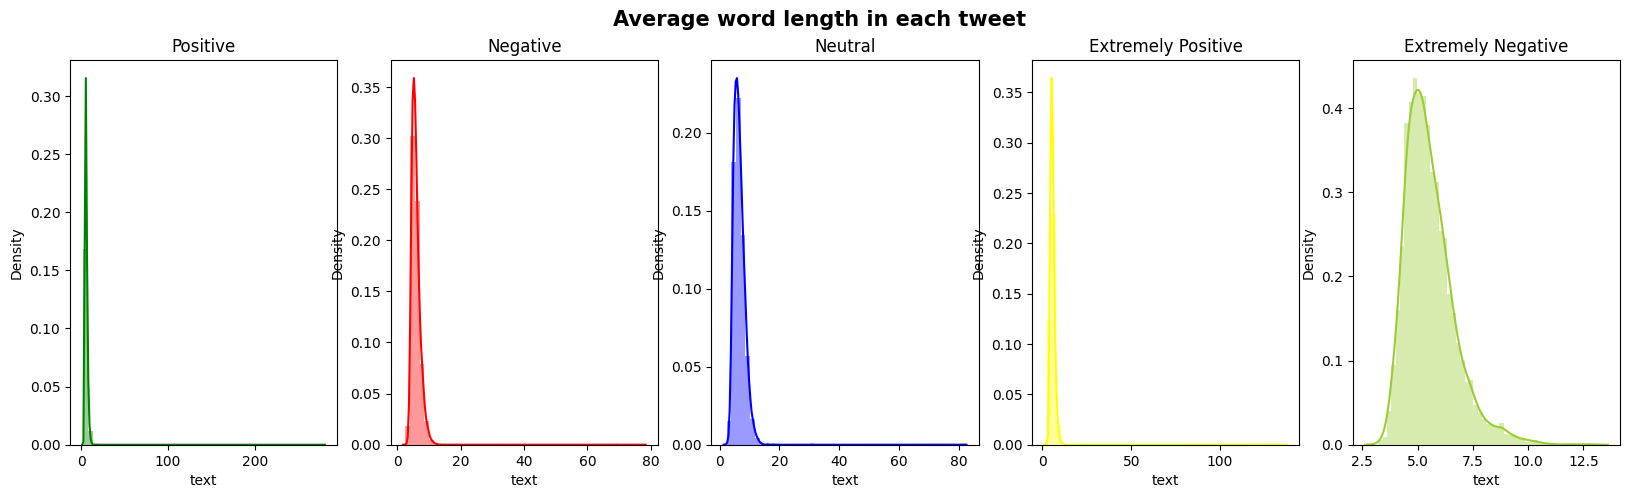

In [ ]:
# Finding the average word length in each tweet sentiment type.
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,5))
word= tt_df[tt_df['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Positive')

word= tt_df[tt_df['Sentiment']=="Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative')

word= tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='blue')
ax3.set_title('Neutral')

word= tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax4,color='yellow')
ax4.set_title('Extremely Positive')

word= tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax5,color='yellowgreen')
ax5.set_title('Extremely Negative')

# Showing the Plot

fig.suptitle('Average word length in each tweet', size=15,fontweight="bold")
plt.show()

#**Looking occurance times between different tweeting date and sentiments associated with that particular date**

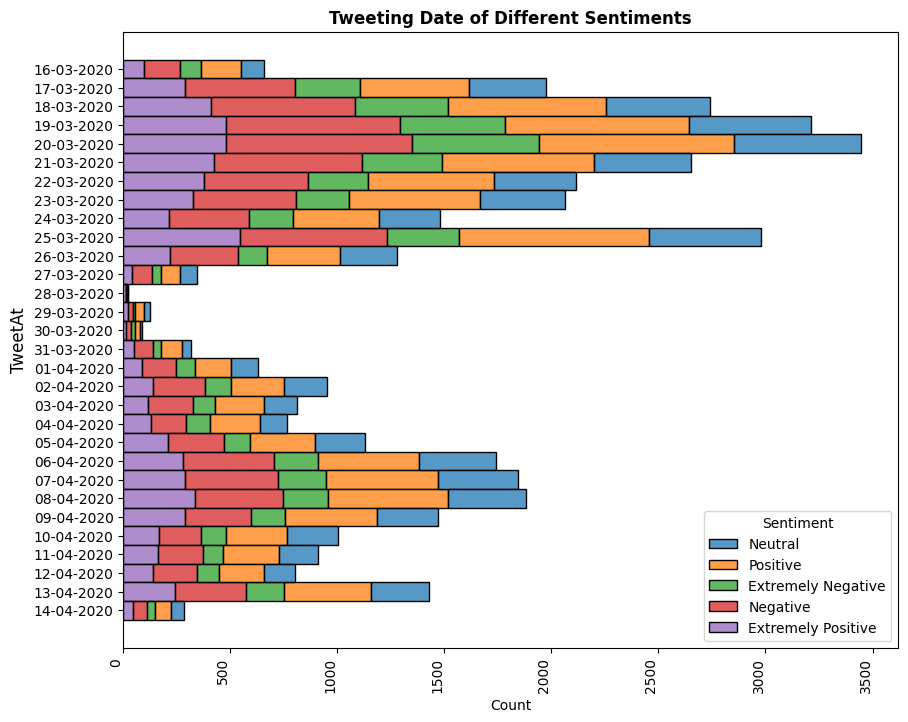

In [ ]:
# Plotting Tweet date with different sentiments
plt.figure(figsize=(10,8))
sns.histplot(data=df_model, y= "TweetAt", hue="Sentiment", multiple="stack")
plt.xticks(rotation=90, ha='right')
plt.title("Tweeting Date of Different Sentiments", fontweight='bold')
plt.ylabel("TweetAt",fontsize = 12)
plt.show()

* The above plot shows the distribution of different sentiments on the basis of tweeting date (TweetAt - column).
* Here it can be analysed that date on 20-03-2020, when maximum tweet took place showing the maximum sentiment types. Among all the sentiments, positive sentiment dominates the most followed by the negative in second place.
* Least tweeting date is 28-03-2020, according to plot, where the number of sentiments is also very less compared to other dates.
* The number of extremely positive sentiment tweet can be observed on 25-03-2020.
* In same way maximum neutral sentiment tweeted on 20-03-2020.
* Extremely positive sentiment tweeted most on 25-03-2020 whereas extremely negative sentiment tweeted most on 20-03-2020.
* By seeing all the insight, it can be sensed that this period of 30 days or 1 month, most number of tweets can been seen in the month of March in compare to April month for year 2020.
* This period is also important because from the month of March globally the number COVID-19 cases started, which triggered many people.

#**Punctuations Available in Sentiments**

In [ ]:
# Creating the corpus from the sentiment & text column and appending them
def create_corpus(target):
    corpus=[]

    for x in tt_df[tt_df['Sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)

    return corpus

In [ ]:
# Importing the required library
from collections import defaultdict

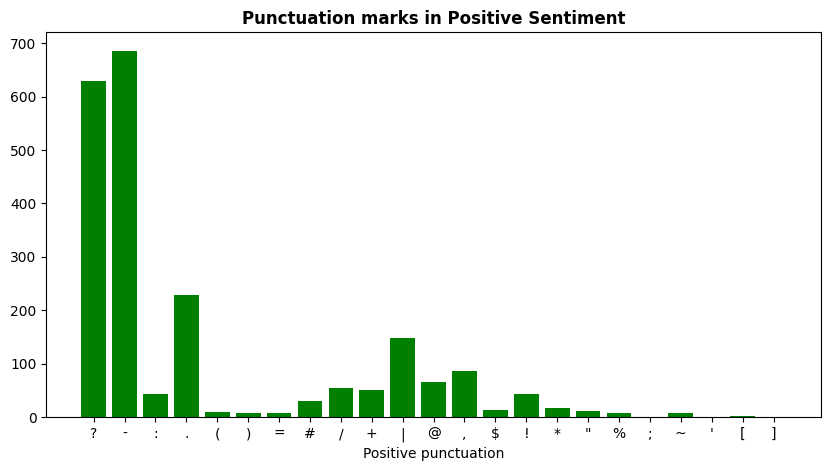

In [ ]:
# Creating the collection for each sentiment having different punctuation marks for "Positive Sentiment"
corpus= create_corpus("Positive")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())


# Plotting the required dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='green')
plt.xlabel('Positive punctuation')
plt.title('Punctuation marks in Positive Sentiment',fontweight ='bold')
plt.show()

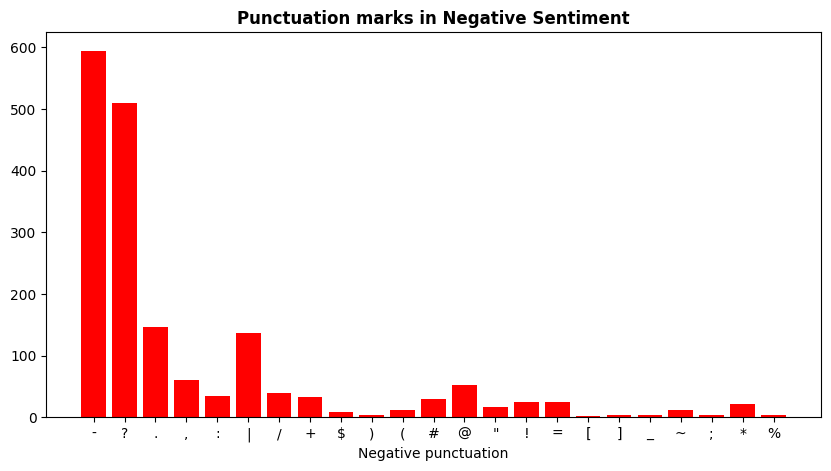

In [ ]:
# Creating the collection for each sentiment having different punctuation marks for "Negative Sentiment"
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())


# Plotting the required dataset
plt.figure(figsize=(10,5))
plt.bar(x,y, color='red')
plt.xlabel('Negative punctuation')
plt.title('Punctuation marks in Negative Sentiment',fontweight ='bold')
plt.show()

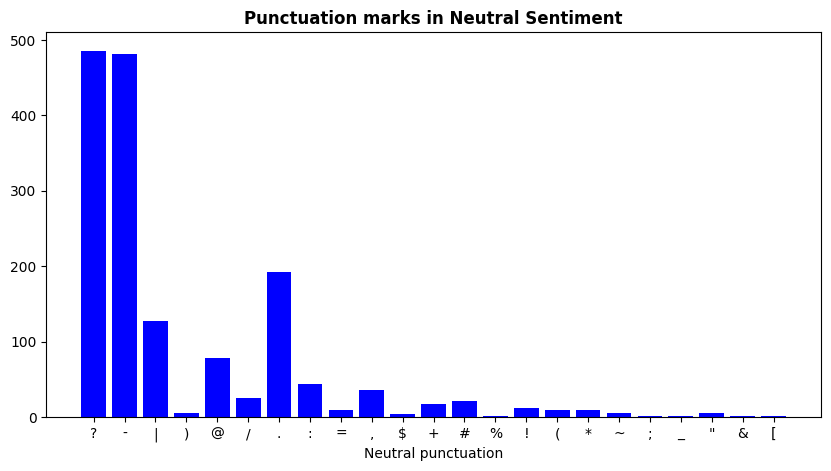

In [ ]:
# Creating the collection for each sentiment having different punctuation marks for "Neutral Sentiment"
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())


# Plotting the required dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='blue')
plt.xlabel('Neutral punctuation')
plt.title('Punctuation marks in Neutral Sentiment',fontweight ='bold')
plt.show()

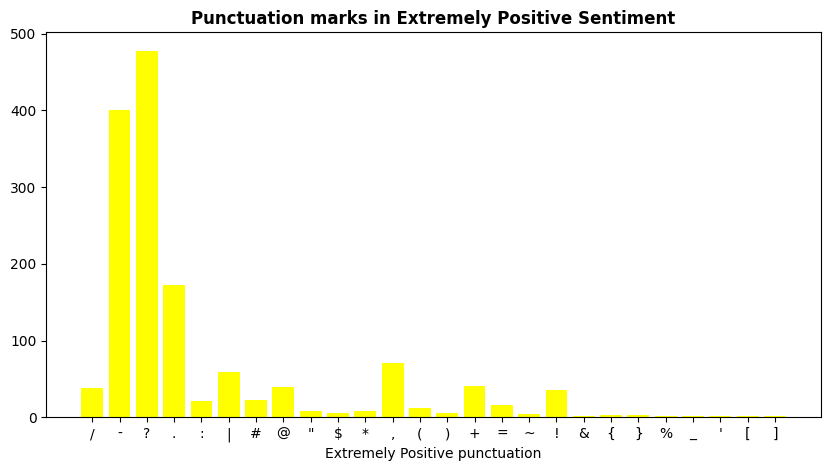

In [ ]:
# Creating the collection for each sentiment having different punctuation marks for "Extremely Positive Sentiment"
corpus=create_corpus("Extremely Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())


# Plotting the required dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='yellow')
plt.xlabel('Extremely Positive punctuation')
plt.title('Punctuation marks in Extremely Positive Sentiment',fontweight ='bold')
plt.show()

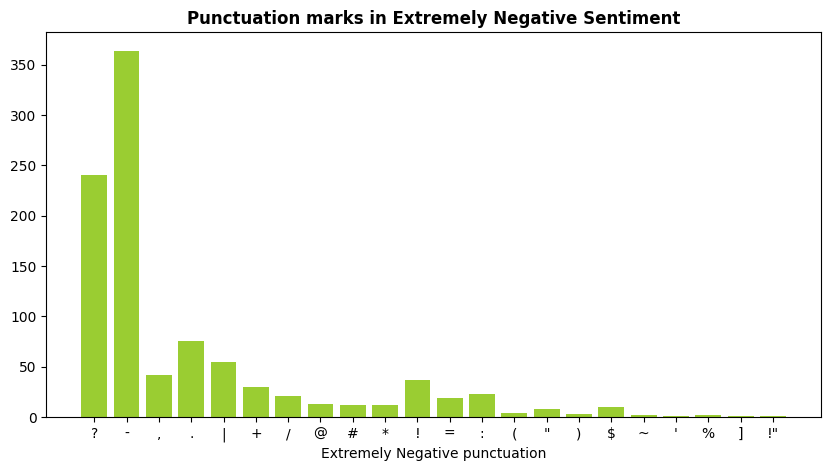

In [ ]:
# Creating the collection for each sentiment having different punctuation marks for "Extremely Negative Sentiment"
corpus=create_corpus("Extremely Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())


# Plotting the required dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='yellowgreen')
plt.xlabel('Extremely Negative punctuation')
plt.title('Punctuation marks in Extremely Negative Sentiment',fontweight ='bold')
plt.show()

#**Mentions present in the Tweets**

Text(0.5, 1.0, 'Top 10 Mentions Present in Tweets')

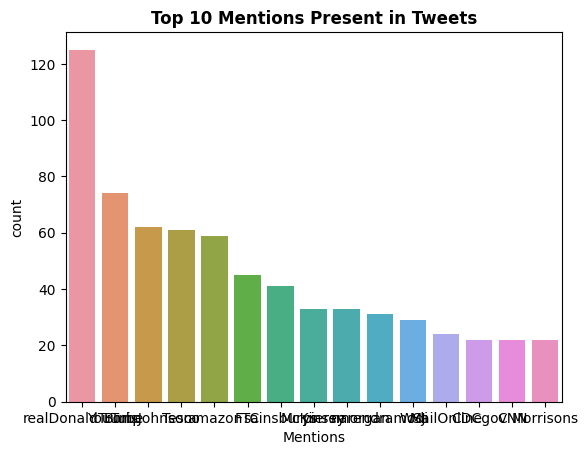

In [ ]:
# Finding the different mentions present in tweets with having mentions using @
def mentions(text):
    import re
    line=re.findall(r'(?<=@)\w+',text)

    return " ".join(line)

tt_df['mentions']=tt_df['text'].apply(lambda x:mentions(x))

temp=tt_df['mentions'].value_counts()[:][1:16]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})


# Ploting the bar plot
sns.barplot(x="Mentions",y="count", data = temp)
plt.title("Top 10 Mentions Present in Tweets", fontweight='bold')

In [ ]:
# Importing the required library
import plotly.express as px

In [ ]:
# Finding top 10 mentions in the tweet
b = tt_df['mentions'].value_counts()[:][1:16].index.tolist()
a = tt_df['mentions'].value_counts()[:][1:16].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a


# Plotting the treemap for different mentions
fig = px.treemap(row, path= ["scenario"], values="Percentage",title='<b>Tree of Mentions<b>',width=1200, height=600)
#fig.update_layout(margin = dict(t=25, l=10, r=10, b=10))
fig.show()

#**4. OriginalTweet Length**

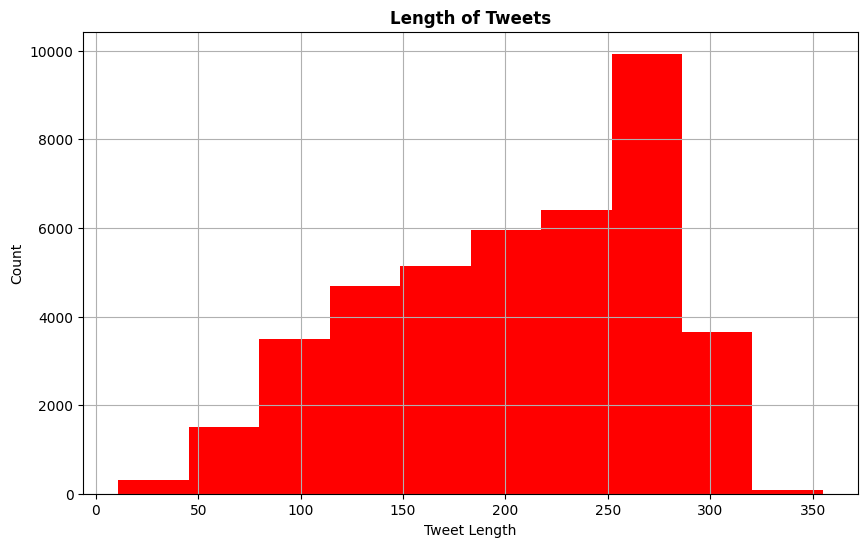

In [ ]:
plt.figure(figsize=(10,6))
plt.grid()
plt.hist(df_model['OriginalTweet'].str.len(), color='red')
plt.ylabel('Count')
plt.xlabel('Tweet Length')
plt.title('Length of Tweets', fontweight='bold')
plt.show()

#**Relation between OriginalTweet and TweetAt Column**

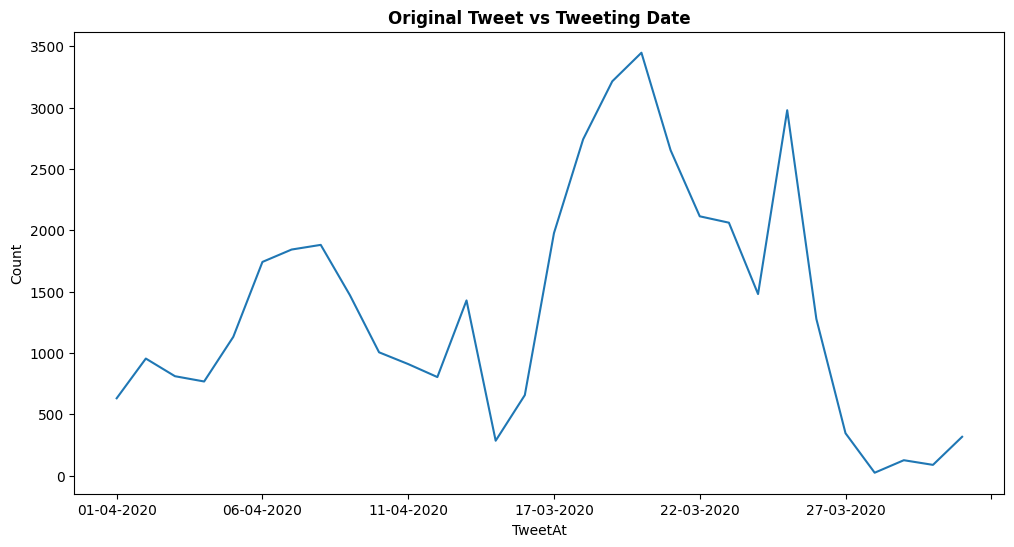

In [ ]:
plt.figure(figsize=(12,6))
grp_tweetAt = df_model.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.ylabel('Count')
plt.title('Original Tweet vs Tweeting Date', fontweight='bold')
plt.show()

#**Text Preprocessing Steps**

**Short Overview:** The preprocessing of the text data is an essential step as it makes the raw text ready for mining.

* The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

* As mentioned earlier, the tweets contain lots of twitter handles (@user). We will remove all these twitter handles from the data as they don’t convey much information.
* We are having twitter links in the data which are not useful for our Model. It will make our data noisy.
* As discussed, punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles,links and hashtags.
* Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc.To remove stop words from a sentence, you can divide your text into words and then remove the word if it exits in the list of stop words provided by NLTK.
* Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “ed”, “s” etc) from a word. For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.
* Lemmatization is the grouping of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.
* In tokenization we convert group of sentence into token . It is also called text segmentation or lexical analysis. It is basically splitting data into small chunk of words. Tokenization in python can be done by python NLTK library’s word_tokenize() function.

#**Text CLeaning**

In [ ]:
import re

In [ ]:
twt_df = df_model.copy()

a) Remove @person character

In [ ]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

b) Removing url, http, etc.

In [ ]:
# create new column with removed @user
twt_df['Clean_tweet'] = np.vectorize(remove_pattern)(twt_df['OriginalTweet'], '@[\w]*')
twt_df.head()

OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

    Location     TweetAt                                        Clean_tweet  
0     London  16-03-2020     https://t.co/iFz9FAn2Pa and https://t.co/xX...  
1         UK  16-03-2020  advice Talk to your neighbours family to excha...  
2  Vagabonds  16-03-2020  Coronavirus Australia: Woolworths to give elde...  
3        NaN  16-03-2020  My food stock is not the only one which is emp...  
4        NaN  16-03-2020  Me, ready to go at supermarket during the #COV...

In [ ]:
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
twt_df.head()

OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

    Location     TweetAt                                        Clean_tweet  
0     London  16-03-2020                                                     
1         UK  16-03-2020  advice Talk to your neighbours family to excha...  
2  Vagabonds  16-03-2020  Coronavirus Australia: Woolworths to give elde...  
3        NaN  16-03-2020  My food stock is not the only one which is emp...  
4        NaN  16-03-2020  Me, ready to go at supermarket during the #COV...

c) Remove puntuations, words which are not formed letters

In [ ]:
# remove special characters, numbers, punctuations
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')
twt_df.head()

OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

    Location     TweetAt                                        Clean_tweet  
0     London  16-03-2020                                                     
1         UK  16-03-2020  advice Talk to your neighbours family to excha...  
2  Vagabonds  16-03-2020  Coronavirus Australia Woolworths to give elder...  
3        NaN  16-03-2020  My food stock is not the only one which is emp...  
4        NaN  16-03-2020  Me ready to go at supermarket during the #COVI...

d) Removing short words

In [ ]:
# remove short words
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
twt_df.head()

OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

    Location     TweetAt                                        Clean_tweet  
0     London  16-03-2020                                                     
1         UK  16-03-2020  advice Talk your neighbours family exchange ph...  
2  Vagabonds  16-03-2020  Coronavirus Australia Woolworths give elderly ...  
3        NaN  16-03-2020  food stock not the only one which empty PLEASE...  
4        NaN  16-03-2020  ready supermarket during the #COVID outbreak N...

e) Create new variable tokenized tweet

In [ ]:
# create new variable tokenized tweet
tokenized_tweet = twt_df['Clean_tweet'].apply(lambda x: x.split())
twt_df.head()

OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

    Location     TweetAt                                        Clean_tweet  
0     London  16-03-2020                                                     
1         UK  16-03-2020  advice Talk your neighbours family exchange ph...  
2  Vagabonds  16-03-2020  Coronavirus Australia Woolworths give elderly ...  
3        NaN  16-03-2020  food stock not the only one which empty PLEASE...  
4        NaN  16-03-2020  ready supermarket during the #COVID outbreak N...

f) Converting text data to lowercase

In [ ]:
# Creating lower case
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: " ".join(x.lower()
                                                        for x in x.split()))

g) Stemming

In [ ]:
# Importing Stemming library
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
twt_df.head()

OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

    Location     TweetAt                                        Clean_tweet  
0     London  16-03-2020                                                     
1         UK  16-03-2020  advice talk your neighbours family exchange ph...  
2  Vagabonds  16-03-2020  coronavirus australia woolworths give elderly ...  
3        NaN  16-03-2020  food stock not the only one which empty please...  
4        NaN  16-03-2020  ready supermarket during the #covid outbreak n...

h) Lemmatization

In [ ]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
twt_df.head()

OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

    Location     TweetAt                                        Clean_tweet  
0     London  16-03-2020                                                     
1         UK  16-03-2020  advice talk your neighbours family exchange ph...  
2  Vagabonds  16-03-2020  coronavirus australia woolworths give elderly ...  
3        NaN  16-03-2020  food stock not the only one which empty please...  
4        NaN  16-03-2020  ready supermarket during the #covid outbreak n...

i) Tokenization

In [ ]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [ ]:
twt_df['Clean_tweet']  = tokenized_tweet
twt_df.head()

OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

    Location     TweetAt                                        Clean_tweet  
0     London  16-03-2020                                                     
1         UK  16-03-2020  advic talk your neighbour famili exchang phone...  
2  Vagabonds  16-03-2020  coronaviru australia woolworth give elderli di...  
3        NaN  16-03-2020  food stock not the onli one which empti plea d...  
4        NaN  16-03-2020  readi supermarket dure the #covid outbreak not...

#**Story Generation from Tweets**

We might think what will be the more different insights we can get it from the Tweets, hence some of the question can come-

* What will be the most common words in the tweets ?
* What is the importance of hashtags in different sentimental tweets ?
* Most trending hashtag in the tweets ?
* Is their any difference in the trending hashtags of positive and negative tweets ?
* How wordclouds can be important to our tweets ?

#**Importance of Hashtags on Tweet Sentiments**

In [ ]:
# Using function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# Extracting hashtags from different tweets as per sentiments
Htg_Extremely_Positive = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Extremely Positive'])
Htg_Positive = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Positive'])
Htg_Neutral = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Neutral'])
Htg_Negative = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Negative'])
Htg_Extremely_Negative = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Extremely Negative'])

In [ ]:
# Unnesting list
Htg_Extremely_Positive = sum(Htg_Extremely_Positive, [])
Htg_Positive = sum(Htg_Positive, [])
Htg_Neutral = sum(Htg_Neutral, [])
Htg_Negative = sum(Htg_Negative,[])
Htg_Extremely_Negative = sum(Htg_Extremely_Negative,[])

In [ ]:
# Printing the result
print("Hashtag Extremely Positive Words : ", Htg_Extremely_Positive)
print("Hashtag Positive Words : ", Htg_Positive)
print("Hashtag Neutral Words : ", Htg_Neutral)
print("Hashtag Negative Words : ", Htg_Negative)
print("Hashtag Extremely Negative Words : ", Htg_Extremely_Negative)

Hashtag Extremely Positive Words :  ['horningsea', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'iptvnew', 'iptv2020', 'Adult', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'ipTv', '18Movies', 'consumer', 'covid19', 'tracker', 'BreakingNews', 'Breaking', 'Coronavirus', 'CoronavirusOutbreak', 'COVID19', 'COVID', 'COVID_19', 'COVID2019', 'Collapse', 'CoronavirusOutbreak', 'coronavirus', 'COVID2019', 'jlmco', 'jlmcobrand', 'coronapocolypse', 'coronavirus', 'CoronavirusOutbreak', 'COVID19', 'shoponline', 'coronavirus', 'COVID19', 'peoplearelosingtheirminds', 'StopTheMadness', 'stoppanicbuying', 'coronavirus', 'StopPanicBuying', 'BeKind', 'mufc', 'MUFC_Family', 'Malaysia2020', 'Malaysia

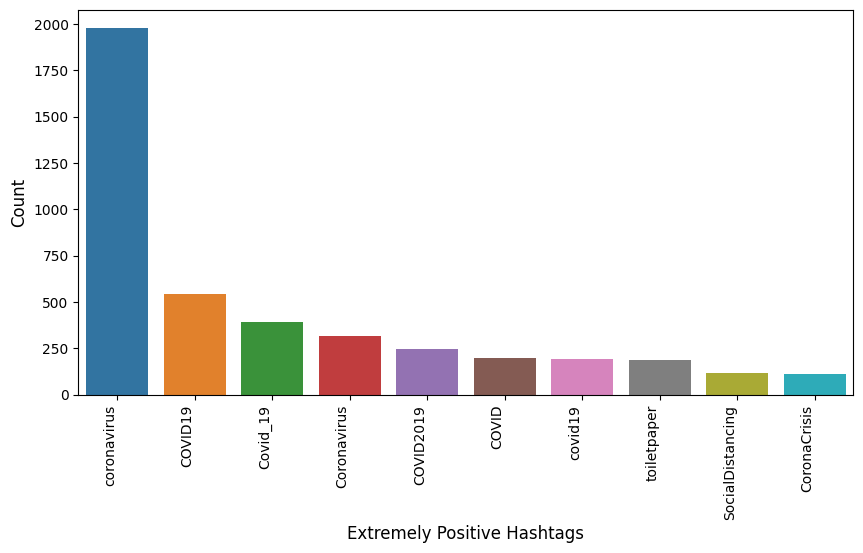

In [ ]:
# Making frequency distribution top 10 Extremely Positive hashtags
a = nltk.FreqDist(Htg_Extremely_Positive)

#Creating dataframe
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})
d = d.nlargest(columns = 'Count', n = 10)


# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.xticks(rotation=90, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Extremely Positive Hashtags",fontsize = 12)
plt.show()

* The above bar plot shows the top 10 most occuring "Hashtags" for **extremely positive** sentiment tweets.
* **"Coronavirus"** trends the most among the other hashtags and its count value ranged between 1750 and 2000.

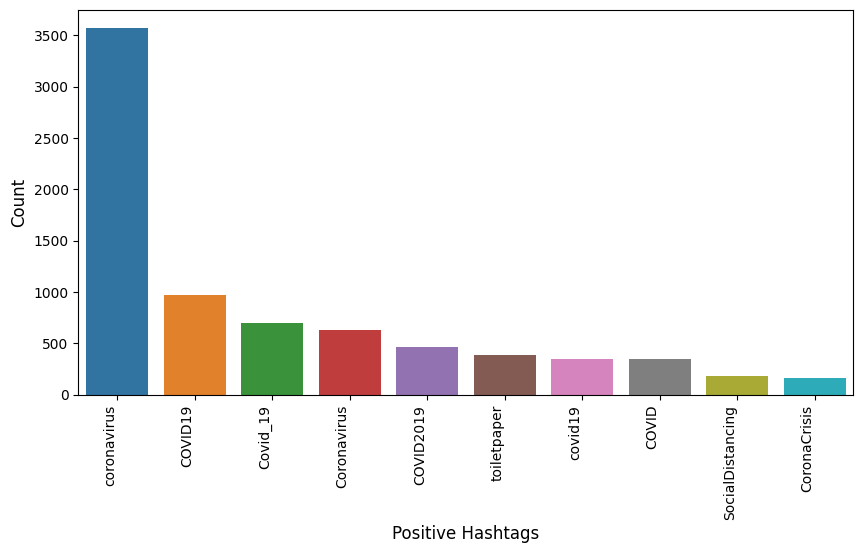

In [ ]:
# Making frequency distribution top 10 Positive hashtags
b = nltk.FreqDist(Htg_Positive)

#Creating dataframe
d = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count' : list(b.values())})
d = d.nlargest(columns = 'Count', n = 10)


# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.xticks(rotation=90, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Positive Hashtags",fontsize = 12)
plt.show()

* The above bar plot shows the top 10 most occuring "Hashtags" for **positive sentiment** tweets.
* **"Coronavirus"** trends the most among the other hashtags and its count value reached above 3500 and more.

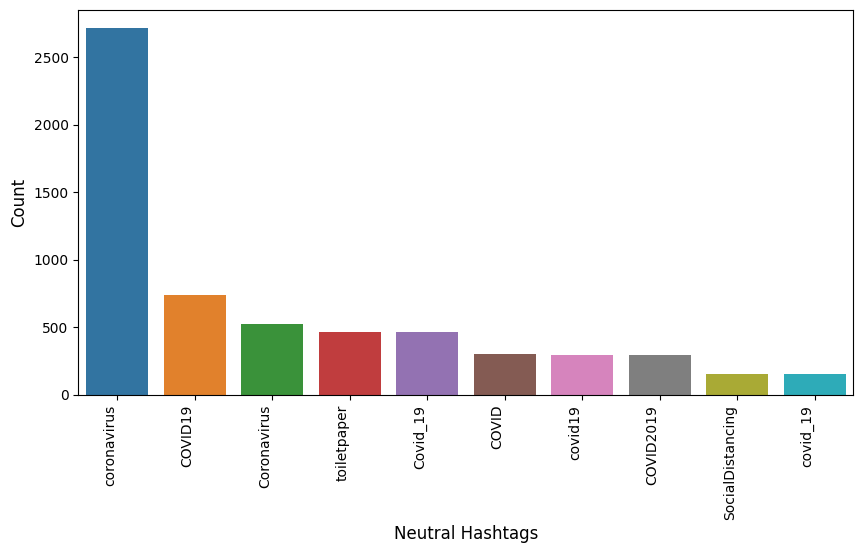

In [ ]:
# making frequency distribution top 10 Neutral hashtags
c = nltk.FreqDist(Htg_Neutral)

#Creating dataframe
d = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count' : list(c.values())})
d = d.nlargest(columns = 'Count', n = 10)


# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.xticks(rotation=90, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Neutral Hashtags",fontsize = 12)
plt.show()

* The above bar plot shows the top 10 most occuring "Hashtags" for **neutral** sentiment tweets.
* **"Coronavirus"** trends the most among the other hashtags and its count value reached above 2500 and more.

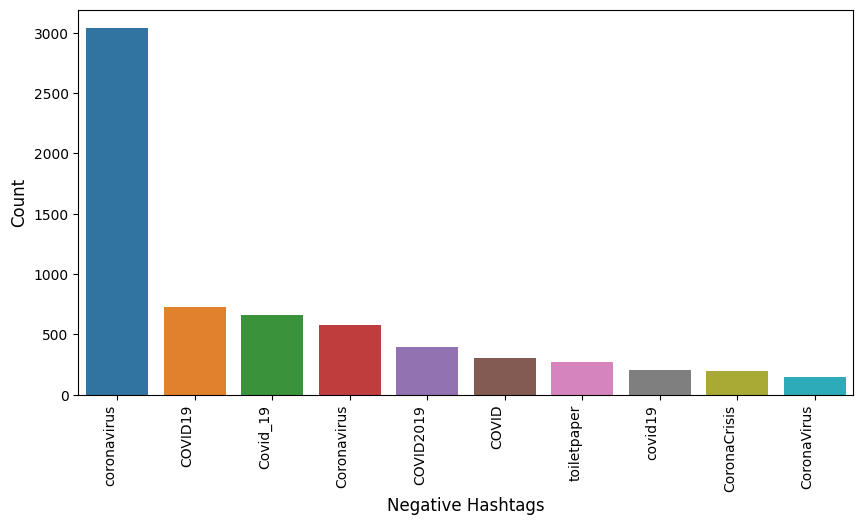

In [ ]:
# making frequency distribution top 10 Negative hashtags
e = nltk.FreqDist(Htg_Negative)

#Creating dataframe
d = pd.DataFrame({'Hashtag': list(e.keys()),
                  'Count' : list(e.values())})
d = d.nlargest(columns = 'Count', n = 10)


# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.xticks(rotation=90, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Negative Hashtags",fontsize = 12)
plt.show()

* The above bar plot shows the top 10 most occuring "Hashtags" for **negative** sentiment tweets.
* **"Coronavirus"** trends the most among the other hashtags and its count value reached most at around 3000.

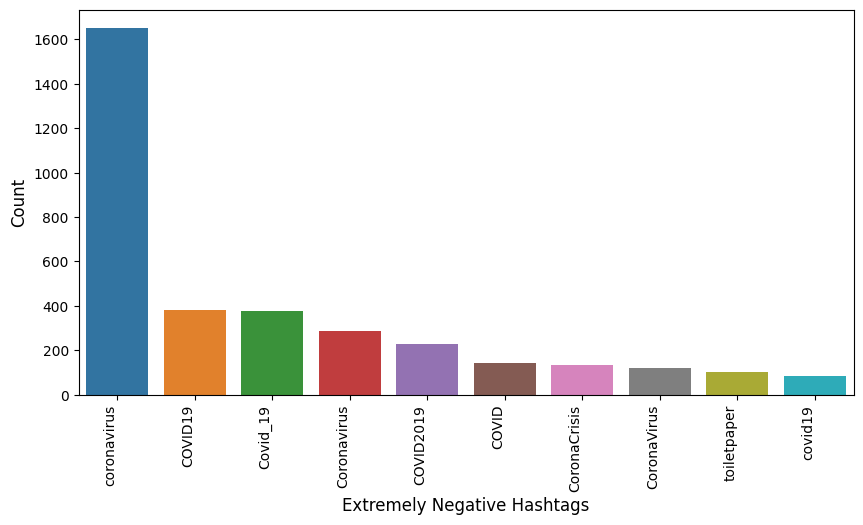

In [ ]:
# making frequency distribution top 10 Extremely Negative hashtags
f = nltk.FreqDist(Htg_Extremely_Negative)

#Creating dataframe
d = pd.DataFrame({'Hashtag': list(f.keys()),
                  'Count' : list(f.values())})
d = d.nlargest(columns = 'Count', n = 10)


# Plotting the result
plt.figure(figsize = (10,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.xticks(rotation=90, ha='right')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Extremely Negative Hashtags",fontsize = 12)
plt.show()

* The above bar plot shows the top 10 most occuring "Hashtags" for **extremely negative** sentiment tweets.
* **"Coronavirus"** trends the most among the other hashtags and its count value reached most at around 1600.

#**Word Cloud**

In [ ]:
# Importing the required libraries for Word Cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import os
from os import path

**Here we are representing the most occuring words in our dataset in common first. Further word cloud of each sentiments has also shown, which help us to analyse which words are used frequently for each of the sentiments, respectively.**

In [ ]:
# Creating new dataframe
cld_df = twt_df[['Clean_tweet', 'Sentiment']]
cld_df.head(15)

Clean_tweet           Sentiment
0                                                                 Neutral
1   advic talk your neighbour famili exchang phone...            Positive
2   coronaviru australia woolworth give elderli di...            Positive
3   food stock not the onli one which empti plea d...            Positive
4   readi supermarket dure the #covid outbreak not...  Extremely Negative
5   news the region first confirm covid case came ...            Positive
6   cashier groceri store wa share hi insight #cov...            Positive
7   wa the supermarket today didn buy toilet paper...             Neutral
8   due covid our retail store and classroom atlan...            Positive
9   for corona prevent should stop buy thing with ...            Negative
10  all month there hasn been crowd the supermarke...             Neutral
11  due the covid situat have increas demand for a...  Extremely Positive
12  #horningsea care commun let all look after the...  Extremely Positive
13  don need stock food just have amazon deliv wha...            Positive
14  adara releas covid resourc center for travel b...            Positive

In [ ]:
# Encoding the sentiments from 0 to 4 i.e., from extremely positive to extremely negative
sentiment_map = {"Extremely Negative":4, "Negative":3, "Neutral":2, "Positive":1,"Extremely Positive":0}
cld_df['Sentiment'] = cld_df['Sentiment'].map(sentiment_map)

In [ ]:
cld_df.head(15)

Clean_tweet  Sentiment
0                                                              2
1   advic talk your neighbour famili exchang phone...          1
2   coronaviru australia woolworth give elderli di...          1
3   food stock not the onli one which empti plea d...          1
4   readi supermarket dure the #covid outbreak not...          4
5   news the region first confirm covid case came ...          1
6   cashier groceri store wa share hi insight #cov...          1
7   wa the supermarket today didn buy toilet paper...          2
8   due covid our retail store and classroom atlan...          1
9   for corona prevent should stop buy thing with ...          3
10  all month there hasn been crowd the supermarke...          2
11  due the covid situat have increas demand for a...          0
12  #horningsea care commun let all look after the...          0
13  don need stock food just have amazon deliv wha...          1
14  adara releas covid resourc center for travel b...          1

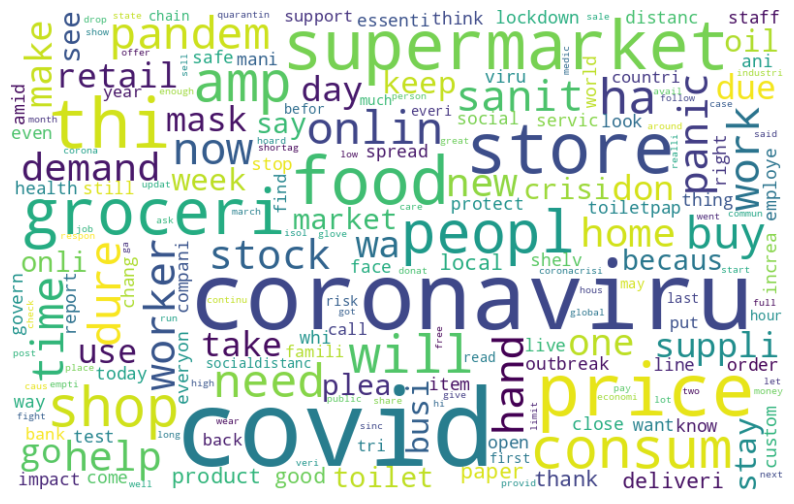

In [ ]:
# Most occuring words of all in Tweets
all_words = ' '.join([text for text in cld_df.Clean_tweet])
wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21,  max_font_size=110, stopwords = set(STOPWORDS), collocations=False,).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

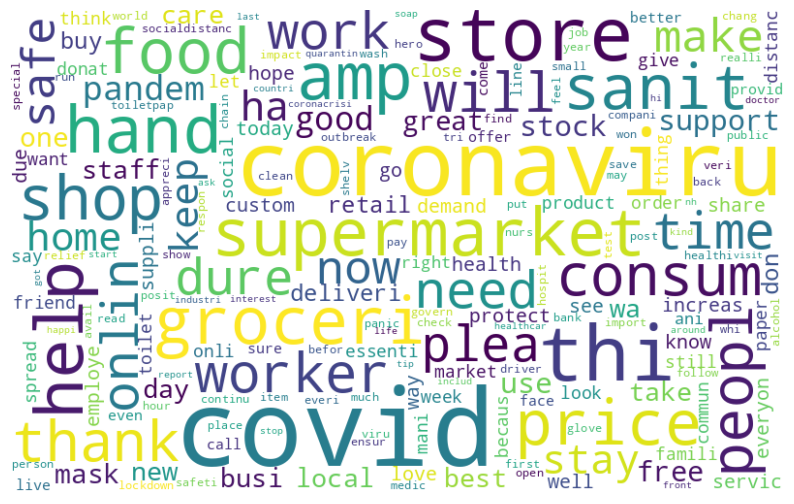

In [ ]:
# Most common occuring words in "Extremely Positive" sentiment
Extremely_Positive =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 0]])

wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS), collocations=False).generate(Extremely_Positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

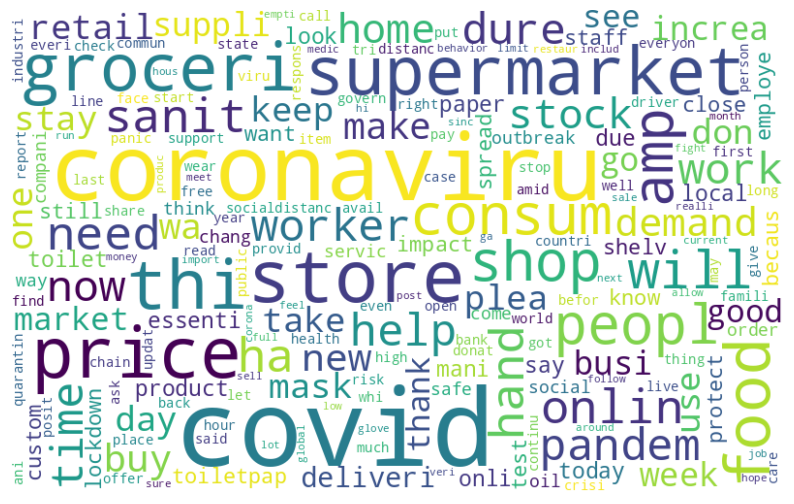

In [ ]:
# Most common occuring words in "Positive" sentiment
Positive =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 1]])

wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),collocations=False).generate(Positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

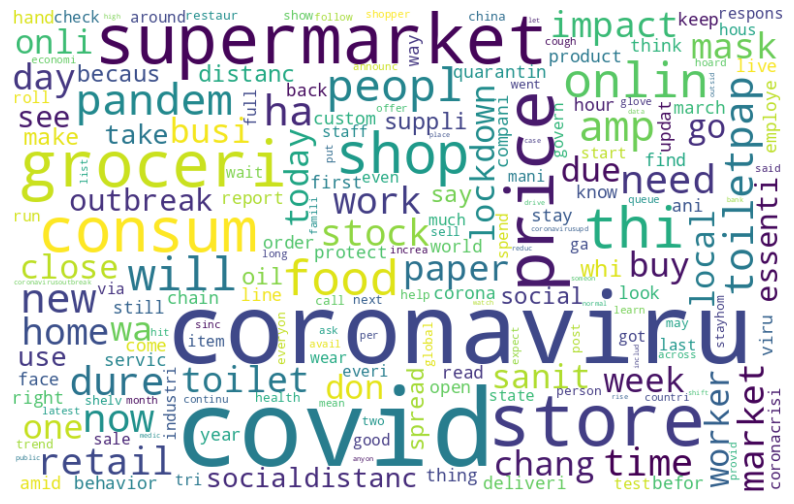

In [ ]:
# Most common occuring words in "Neutral" sentiment
Neutral =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 2]])

wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),collocations=False).generate(Neutral)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

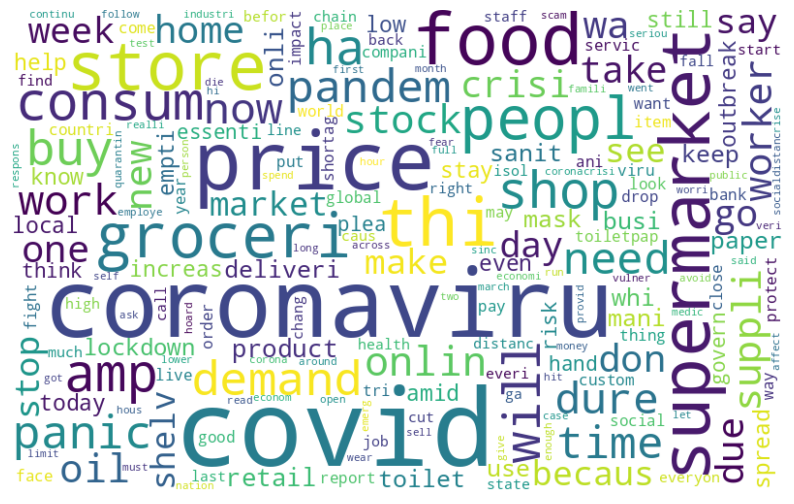

In [ ]:
# Most common occuring words in "Negative" sentiment
Negative =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 3]])

wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),collocations=False).generate(Negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

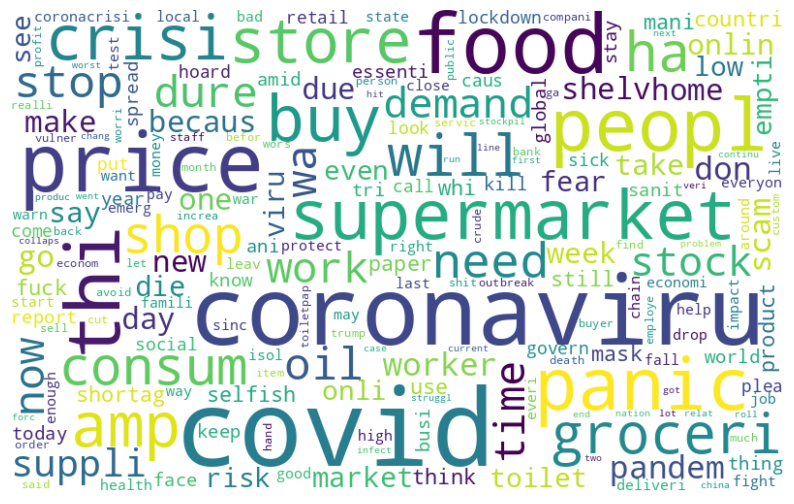

In [ ]:
# Most common occuring words in "Extremely Negative" sentiment
Extremely_Negative =' '.join([text for text in cld_df['Clean_tweet'][cld_df['Sentiment'] == 4]])

wordcloud = WordCloud(background_color = "white", width=800, height=500, random_state=21, max_font_size=110, stopwords = set(STOPWORDS),collocations=False).generate(Extremely_Negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#**Required Features**

In [ ]:
# Creating new dataframe
twt1_df = twt_df[['Clean_tweet', 'Sentiment']]
twt1_df.head(10)

Clean_tweet           Sentiment
0                                                                Neutral
1  advic talk your neighbour famili exchang phone...            Positive
2  coronaviru australia woolworth give elderli di...            Positive
3  food stock not the onli one which empti plea d...            Positive
4  readi supermarket dure the #covid outbreak not...  Extremely Negative
5  news the region first confirm covid case came ...            Positive
6  cashier groceri store wa share hi insight #cov...            Positive
7  wa the supermarket today didn buy toilet paper...             Neutral
8  due covid our retail store and classroom atlan...            Positive
9  for corona prevent should stop buy thing with ...            Negative

**Most Common Words**

In [ ]:
# Most Common words
from collections import Counter
cnt = Counter()
for text in twt1_df.Clean_tweet.values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('the', 44453),
 ('and', 23822),
 ('#coronaviru', 14160),
 ('for', 13836),
 ('are', 11246),
 ('#covid', 10673),
 ('covid', 10574),
 ('you', 9941),
 ('price', 8911),
 ('store', 8207)]

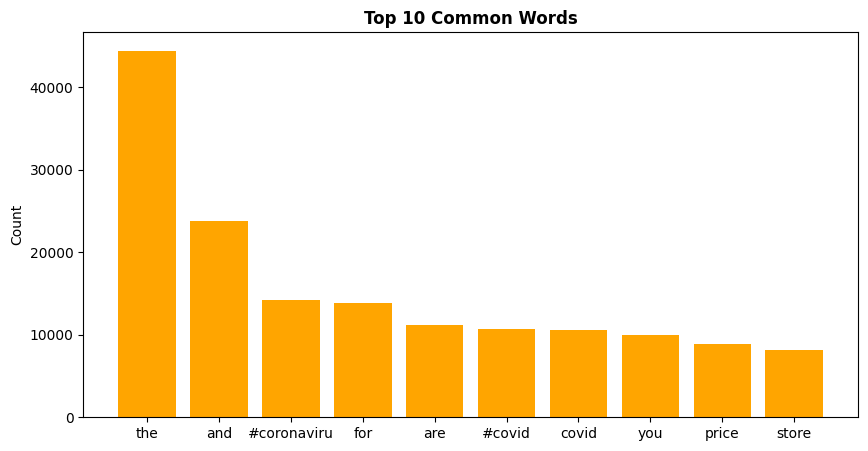

In [ ]:
# Creating top 10 common words used in the tweets
com= sorted(cnt.most_common(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*com)
plt.figure(figsize = (10,5))
plt.bar(x,y, color='orange')
plt.title('Top 10 Common Words', fontweight='bold')
plt.ylabel('Count')
plt.show()

#**Feature Engineering**

**Encoding the sentiment**

In [ ]:
# Encoding the sentiments from -1, 0 and 1 i.e., from extremely positive to extremely negative
sentiment_map = {"Extremely Negative":-1, "Negative":-1, "Neutral":0, "Positive":1,"Extremely Positive":1}
twt1_df['Sentiment'] = twt1_df['Sentiment'].map(sentiment_map)

In [ ]:
# Checking the updated dataframe
twt1_df.head()

Clean_tweet  Sentiment
0                                                             0
1  advic talk your neighbour famili exchang phone...          1
2  coronaviru australia woolworth give elderli di...          1
3  food stock not the onli one which empti plea d...          1
4  readi supermarket dure the #covid outbreak not...         -1

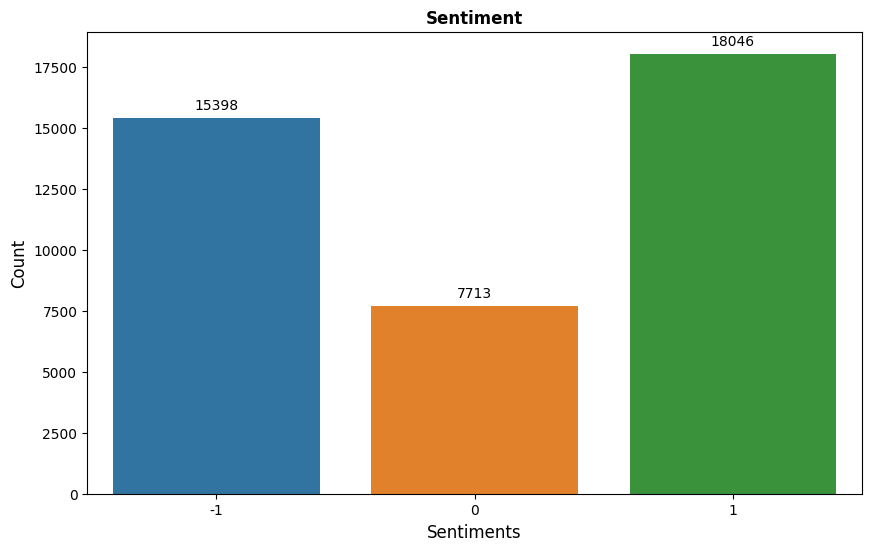

In [ ]:
# Plotting the Encoded Sentiments value as countplot
plt.figure(figsize=(10,6))
splot = sns.countplot(x='Sentiment', data=twt1_df)
# adding annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title("Sentiment", fontweight='bold')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Sentiments",fontsize = 12)
plt.show()

#**Feature Extraction from Cleaned Tweets**

In [ ]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split

In [ ]:
# Checking information
twt1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clean_tweet  41157 non-null  object
 1   Sentiment    41157 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 643.2+ KB


In [ ]:
# Checking shape
twt1_df.shape

(41157, 2)

In [ ]:
# Downloading stopwords library
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Importing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
# Applying stopwords to Clean_tweet column
twt1_df['Clean_tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                       []
1        [v, c,  , l, k,  , u, r,  , n, e, g, h, b, u, ...
2        [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, ...
3        [f,  , c, k,  , n,  , h, e,  , n, l,  , n, e, ...
4        [r, e,  , u, p, e, r, r, k, e,  , u, r, e,  , ...
                               ...                        
41152    [r, l, n,  , p, l,  , f, f, e, r,  , c, k,  , ...
41153    [r, e, p, n,  , c, p, l, n,  , n,  , p, r, v, ...
41154    [u,  , k, n, w,  , g, e,  , u, g, h,  , w, h, ...
41155    [w, r, n, g,  , h,  , h, e,  , e, l, l,  , h, ...
41156    [w, e, l, l,  , n, e, w,  , u, e,  , r, f,  , ...
Name: Clean_tweet, Length: 41157, dtype: object

In [ ]:
# Checking null values
twt1_df.isnull().sum()

Clean_tweet    0
Sentiment      0
dtype: int64

In [ ]:
# Null values showing false
pd.isnull(twt1_df["Sentiment"])

0        False
1        False
2        False
3        False
4        False
         ...  
41152    False
41153    False
41154    False
41155    False
41156    False
Name: Sentiment, Length: 41157, dtype: bool

In [ ]:
# Looking into dataframe
twt1_df.head(3)

Clean_tweet  Sentiment
0                                                             0
1  advic talk your neighbour famili exchang phone...          1
2  coronaviru australia woolworth give elderli di...          1

**Hence, it can be seen there are no nan/null value which means our dataset is clean and is ready for being used for model development**

#**Train-Test Split**

In [ ]:
#stratification means that the train_test_split method returns training
#and test subsets that have the same proportions of class labels as the input dataset.
train,test = train_test_split(twt1_df,test_size = 0.2,random_state=0,
                               stratify = twt1_df.Sentiment.values)

#Printing the result
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (32925, 2)
test shape :  (8232, 2)


#**Count Vectorizer for Multi Class CLassification**

In [ ]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [ ]:
# Applying stopwards and CountVectorizer for NLP
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

# Fitting using transform
X_train = vectorizer.fit_transform(train.Clean_tweet.values)
X_test = vectorizer.transform(test.Clean_tweet.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

# Printing the shape of train and test(valid) values
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 27070)
X_test.shape :  (8232, 27070)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


#**Application of Models along with its Confusion Matrix**

In [ ]:
# Importing libraries for confusion matrix
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import f1_score

plt.rcParams["figure.figsize"] = (8,6)
labels = ['Negative', 'Neutral', 'Positive']

# **IMPLEMENTING MODELS**


---

#**using Count Vectoriser**

#**1. Logistic Regression using Count Vectoriser with GridSearchCV**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#Initalizing the model
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

#fitting the data to model
logreg_Gcv.fit(X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(X_test)

In [ ]:
pred_lr_cv

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.793245869776482


In [ ]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

          -1       0.81      0.81      0.81      3080
           0       0.69      0.68      0.68      1543
           1       0.82      0.83      0.83      3609

    accuracy                           0.79      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232



[[2481  218  381]
 [ 231 1042  270]
 [ 351  251 3007]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

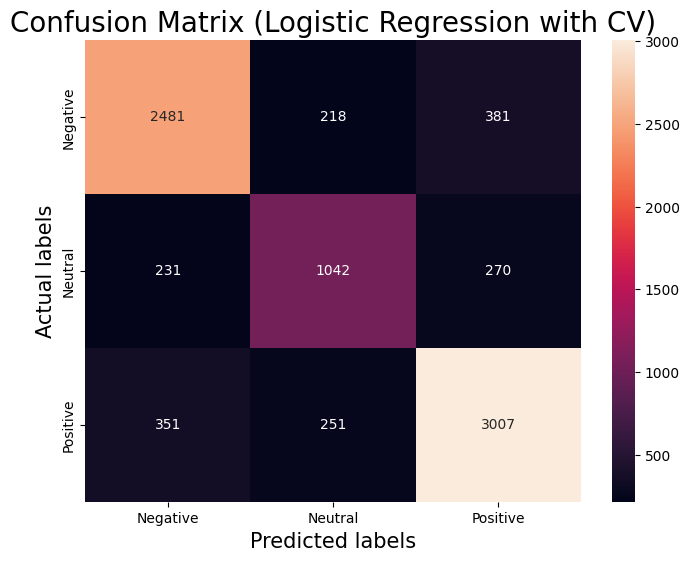

In [ ]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
print(cf1)


ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Observation :**

This model gives an accuracy score of 79.32% which implies that our model is performing well.

#**2. Decision Tree Classifier with count vectoriser**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(X_test)

In [ ]:
pred_dt_cv

array([ 1,  0,  1, ...,  0, -1,  0])

In [ ]:
# Accuracy
cv_score_dt= cross_val_score(dt_cv,X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt)))

Accuracy: 0.6914806378132118


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

          -1       0.70      0.68      0.69      3080
           0       0.61      0.65      0.63      1543
           1       0.74      0.74      0.74      3609

    accuracy                           0.70      8232
   macro avg       0.68      0.69      0.69      8232
weighted avg       0.70      0.70      0.70      8232



[[2063  329  688]
 [ 285 1006  252]
 [ 590  322 2697]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

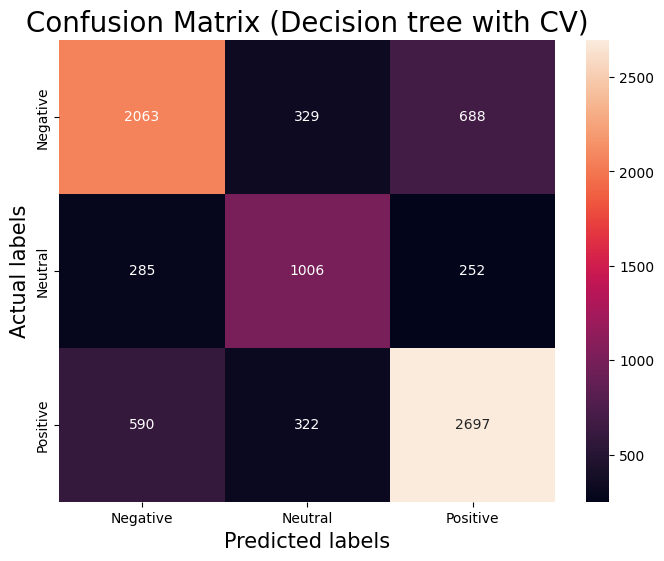

In [ ]:
#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,pred_dt_cv))
print(cf2)


ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Observation :**

This model gives an accuracy score of 69.14% which implies that our model is performing well but the accuracy is less than Logistic Regression.

#**3. XG-Boost classifier with count vectoriser**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)

In [ ]:
# Initializing model
xgb_cv=XGBClassifier()

#fitting the data to model
xgb_cv.fit(X_train,y_train_xgb)

#predicted values
pred_xgb_cv=xgb_cv.predict(X_test)
pred_xgb_cv = le.inverse_transform(pred_xgb_cv)

In [ ]:
pred_xgb_cv

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
# Accuracy
cv_score_xgb= cross_val_score(xgb_cv,X_train,y_train_xgb, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_xgb)))

Accuracy: 0.7776461655277145


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_xgb_cv))

              precision    recall  f1-score   support

          -1       0.81      0.75      0.78      3080
           0       0.66      0.77      0.71      1543
           1       0.81      0.81      0.81      3609

    accuracy                           0.78      8232
   macro avg       0.76      0.78      0.77      8232
weighted avg       0.78      0.78      0.78      8232



[[2324  282  474]
 [ 163 1181  199]
 [ 367  329 2913]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

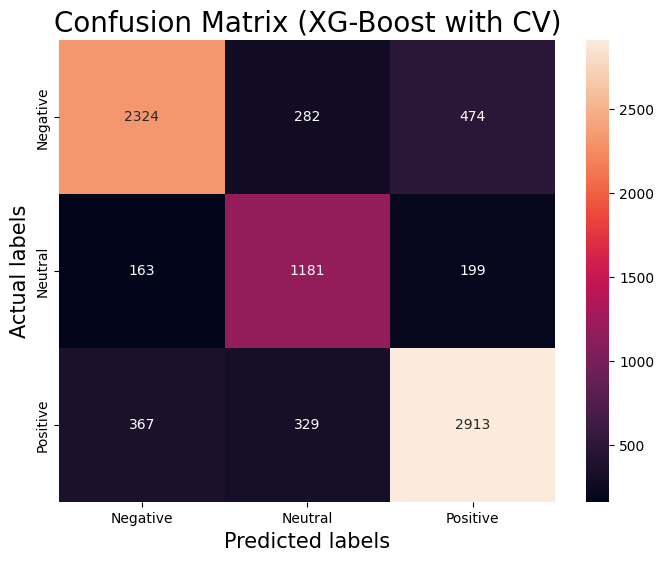

In [ ]:
#Plotting Confussion matrix
cf3= (confusion_matrix(y_test,pred_xgb_cv))
print(cf3)

ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (XG-Boost with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Observation :**

This model gives an accuracy score of 77.76% which implies that our model is performing better than Decision Tree but the accuracy is less than Logistic Regression.

#**4. Random Forest Classifier using count vectoriser with GridSearchCV**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# creating param dict to check diffirent value of parameter
grid_values = {'n_estimators':[60,80,100],
               'max_depth':[100,200,300]}

#fit the parameter with Cross Validation
rf_clf = GridSearchCV(RandomForestClassifier(), param_grid= grid_values,verbose= 3, cv=5, scoring ='accuracy')
#training model
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....max_depth=100, n_estimators=60;, score=0.698 total time=  25.0s
[CV 2/5] END ....max_depth=100, n_estimators=60;, score=0.716 total time=  25.0s
[CV 3/5] END ....max_depth=100, n_estimators=60;, score=0.715 total time=  25.1s
[CV 4/5] END ....max_depth=100, n_estimators=60;, score=0.696 total time=  25.2s
[CV 5/5] END ....max_depth=100, n_estimators=60;, score=0.704 total time=  24.6s
[CV 1/5] END ....max_depth=100, n_estimators=80;, score=0.712 total time=  32.2s
[CV 2/5] END ....max_depth=100, n_estimators=80;, score=0.713 total time=  34.4s
[CV 3/5] END ....max_depth=100, n_estimators=80;, score=0.716 total time=  34.2s
[CV 4/5] END ....max_depth=100, n_estimators=80;, score=0.696 total time=  33.0s
[CV 5/5] END ....max_depth=100, n_estimators=80;, score=0.703 total time=  33.6s
[CV 1/5] END ...max_depth=100, n_estimators=100;, score=0.711 total time=  41.3s
[CV 2/5] END ...max_depth=100, n_estimators=100;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [100, 200, 300],
                         'n_estimators': [60, 80, 100]},
             scoring='accuracy', verbose=3)

In [ ]:
print(rf_clf.best_params_)
print(rf_clf.best_estimator_)

{'max_depth': 300, 'n_estimators': 100}
RandomForestClassifier(max_depth=300)


In [ ]:
#prediction
y_pred_rf_train = rf_clf.predict(X_train)
y_pred_rf_test = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf_test)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )
print(classification_report(y_pred_rf_test,y_test))

Training accuracy Score    :  0.9912224753227031
Testing accuracy Score :  0.7592322643343051
              precision    recall  f1-score   support

          -1       0.75      0.78      0.76      2964
           0       0.67      0.67      0.67      1544
           1       0.81      0.78      0.79      3724

    accuracy                           0.76      8232
   macro avg       0.74      0.74      0.74      8232
weighted avg       0.76      0.76      0.76      8232



[[12192   123     3]
 [    2  6167     1]
 [    4   156 14277]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

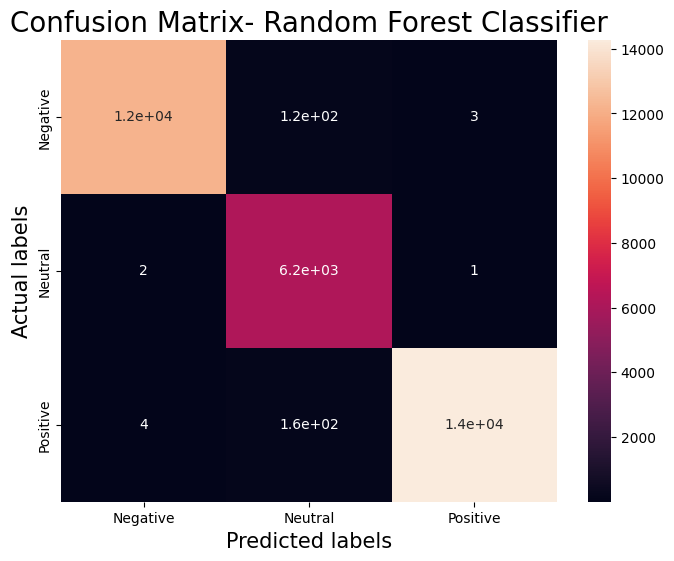

In [ ]:
# Confusion Matrix
cf4 = confusion_matrix(y_train, y_pred_rf_train)
print(cf4)


ax= plt.subplot()
sns.heatmap(cf4, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix- Random Forest Classifier', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


#**Observation :**

This model gives an accuracy score of 75.92% which implies that our model is performing well.

#**5. K-NN Count Vectorizer with GridSearchCV**

In [ ]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_cv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [ ]:
#predicted values
pred_knn_cv = knn_cv.predict(X_test)

In [ ]:
pred_knn_cv

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

Accuracy : 0.42662779397473277


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

              precision    recall  f1-score   support

          -1       0.67      0.34      0.45      3080
           0       0.25      0.80      0.39      1543
           1       0.68      0.34      0.46      3609

    accuracy                           0.43      8232
   macro avg       0.54      0.49      0.43      8232
weighted avg       0.60      0.43      0.44      8232



[[1032 1671  377]
 [ 109 1241  193]
 [ 408 1962 1239]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

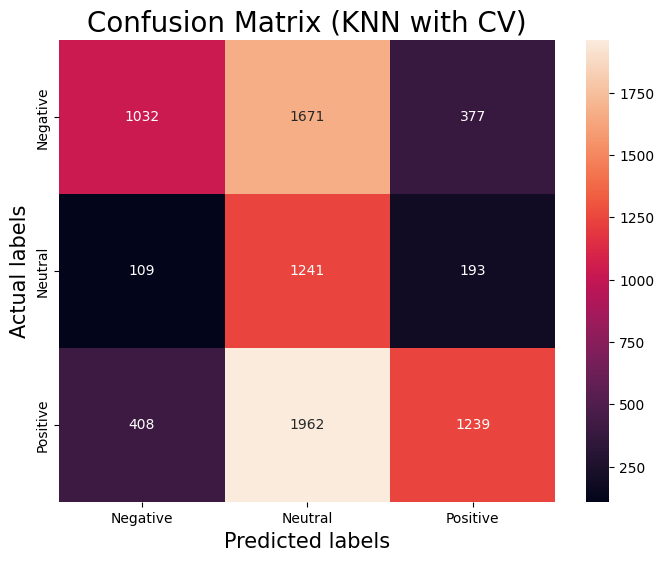

In [ ]:
#Plotting Confussion matrix
cf5= (confusion_matrix(y_test,pred_knn_cv))
print(cf5)

ax= plt.subplot()
sns.heatmap(cf5, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Observation :**

The model is giving an accuracy score of 42.66% which implies that our model is underperforming.

# **IMPLEMENTING MODELS**


---

**using TF/IDF Vectoriser**

In [ ]:
# Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [ ]:
# Applying stopwards and CountVectorizer for NLP
stop = list(stopwords.words('english'))
vectorizer = TfidfVectorizer(decode_error = 'replace',stop_words = stop)

# Fitting using transform
X_train = vectorizer.fit_transform(train.Clean_tweet.values)
X_test = vectorizer.transform(test.Clean_tweet.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

# Printing the shape of train and test(valid) values
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 27070)
X_test.shape :  (8232, 27070)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


In [ ]:
# Importing libraries for confusion matrix
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import f1_score

plt.rcParams["figure.figsize"] = (8,6)
labels = ['Negative', 'Neutral', 'Positive']

#**1. LogisticRegression with TF/IDF vectoriser**

In [ ]:
#Initalizing the model
lr_tfidf = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_GS_tfidf=GridSearchCV(lr_tfidf,parameters,cv=5)

#fitting the data to model
logreg_GS_tfidf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
#predicted values
pred_lr_tv_Gcv = logreg_GS_tfidf.predict(X_test)

In [ ]:
pred_lr_tv_Gcv

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

Accuracy : 0.7896015549076774


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

              precision    recall  f1-score   support

          -1       0.80      0.81      0.81      3080
           0       0.67      0.64      0.66      1543
           1       0.83      0.83      0.83      3609

    accuracy                           0.79      8232
   macro avg       0.77      0.76      0.76      8232
weighted avg       0.79      0.79      0.79      8232



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

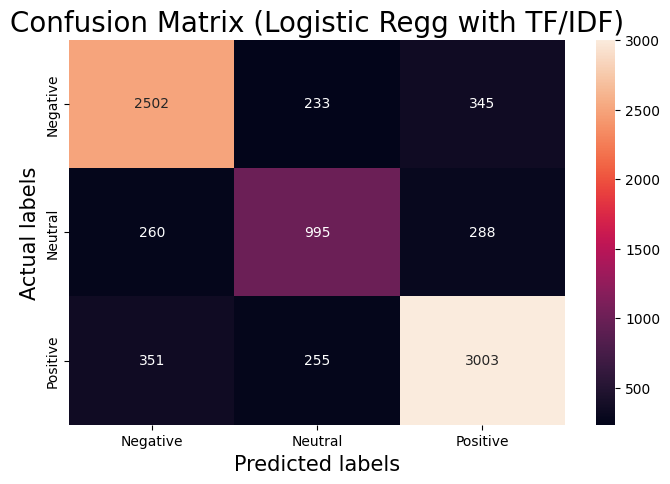

In [ ]:
#Plotting Confussion matrix
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Observation :**

The model is giving an accuracy score of 78.96% which implies that our model is performing well.

#**2. Decision Tree Classifier with TF/IDF Vectoriser**

In [ ]:
# Initializing model
dt_tfidf=DecisionTreeClassifier()

#fitting the data to model
dt_tfidf.fit(X_train,y_train)

#prediction
pred_dt_tfidf=dt_tfidf.predict(X_test)

In [ ]:
pred_dt_tfidf

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
# Accuracy
score_dt_tv= cross_val_score(dt_tfidf,X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(score_dt_tv)))

Accuracy: 0.6362946089597571


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tfidf))

              precision    recall  f1-score   support

          -1       0.65      0.63      0.64      3080
           0       0.52      0.59      0.55      1543
           1       0.71      0.69      0.70      3609

    accuracy                           0.65      8232
   macro avg       0.63      0.64      0.63      8232
weighted avg       0.65      0.65      0.65      8232



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

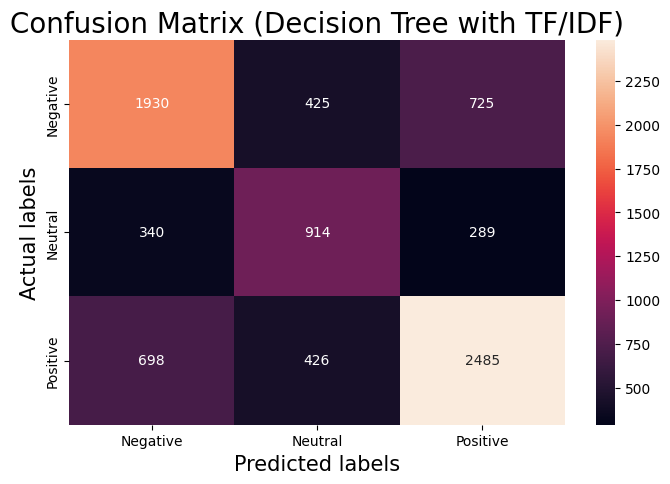

In [ ]:
#Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tfidf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Observation :**

The model is giving an accuracy score of 63.62% which implies that our model is performing well but not better than Logistic Regression.

#**3. XG-Boost Classifier with TF/IDF Vectoriser**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)

In [ ]:
# Initializing model
xgb_tfidf=XGBClassifier()

#fitting the data to model
xgb_tfidf.fit(X_train,y_train_xgb)

#predicted values
pred_xgb_tfidf=xgb_tfidf.predict(X_test)
pred_xgb_tfidf = le.inverse_transform(pred_xgb_tfidf)

In [ ]:
pred_xgb_tfidf

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
# Accuracy
cv_score_xgb_tv= cross_val_score(xgb_tfidf,X_train,y_train_xgb, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_xgb_tv)))

Accuracy: 0.7622171602126044


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_xgb_tfidf))

              precision    recall  f1-score   support

          -1       0.80      0.74      0.77      3080
           0       0.64      0.71      0.67      1543
           1       0.79      0.80      0.80      3609

    accuracy                           0.76      8232
   macro avg       0.74      0.75      0.75      8232
weighted avg       0.77      0.76      0.76      8232



[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

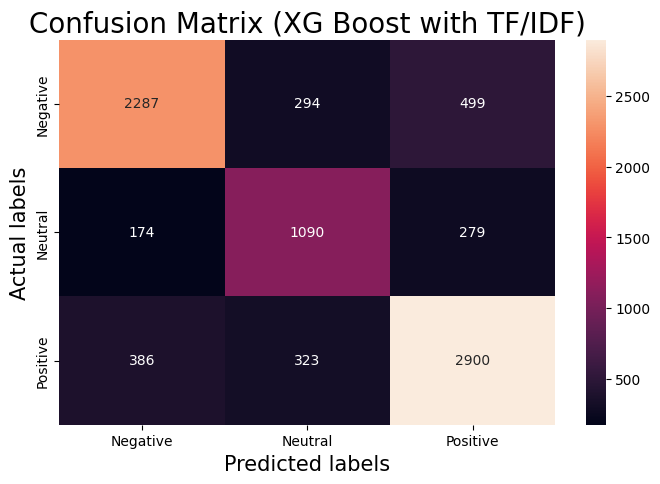

In [ ]:
#Plotting Confussion matrix
cf3a= (confusion_matrix(y_test,pred_xgb_tfidf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (XG Boost with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Observation :**

This model gives an accuracy score of 76.22% which implies that our model is performing well.

#**4. RandomForest Classifier with TF/IDF Vectoriser**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# creating param dict to check diffirent value of parameter
grid_values = {'n_estimators':[60,80,100],
               'max_depth':[100,200,300]}

#fit the parameter with Cross Validation
rf_clf = GridSearchCV(RandomForestClassifier(), param_grid= grid_values,verbose= 3, cv=3, scoring ='accuracy')
#training model
rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ....max_depth=100, n_estimators=60;, score=0.701 total time=  36.7s
[CV 2/3] END ....max_depth=100, n_estimators=60;, score=0.690 total time=  33.3s
[CV 3/3] END ....max_depth=100, n_estimators=60;, score=0.685 total time=  31.8s
[CV 1/3] END ....max_depth=100, n_estimators=80;, score=0.696 total time=  43.1s
[CV 2/3] END ....max_depth=100, n_estimators=80;, score=0.696 total time=  44.6s
[CV 3/3] END ....max_depth=100, n_estimators=80;, score=0.686 total time=  40.0s
[CV 1/3] END ...max_depth=100, n_estimators=100;, score=0.695 total time=  54.1s
[CV 2/3] END ...max_depth=100, n_estimators=100;, score=0.696 total time=  53.4s
[CV 3/3] END ...max_depth=100, n_estimators=100;, score=0.691 total time=  52.0s
[CV 1/3] END ....max_depth=200, n_estimators=60;, score=0.713 total time=  46.6s
[CV 2/3] END ....max_depth=200, n_estimators=60;, score=0.716 total time=  48.1s
[CV 3/3] END ....max_depth=200, n_estimators=60;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [100, 200, 300],
                         'n_estimators': [60, 80, 100]},
             scoring='accuracy', verbose=3)

In [ ]:
print(rf_clf.best_params_)
print(rf_clf.best_estimator_)

{'max_depth': 300, 'n_estimators': 100}
RandomForestClassifier(max_depth=300)


In [ ]:
#prediction
y_pred_rf_train = rf_clf.predict(X_train)
y_pred_rf_test = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf_test)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )
print(classification_report(y_pred_rf_test,y_test))

Training accuracy Score    :  0.9950797266514806
Testing accuracy Score :  0.7357871720116618
              precision    recall  f1-score   support

          -1       0.73      0.76      0.74      2950
           0       0.57      0.67      0.62      1317
           1       0.81      0.74      0.78      3965

    accuracy                           0.74      8232
   macro avg       0.70      0.72      0.71      8232
weighted avg       0.74      0.74      0.74      8232



[[12253    62     3]
 [    1  6168     1]
 [    4    91 14342]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

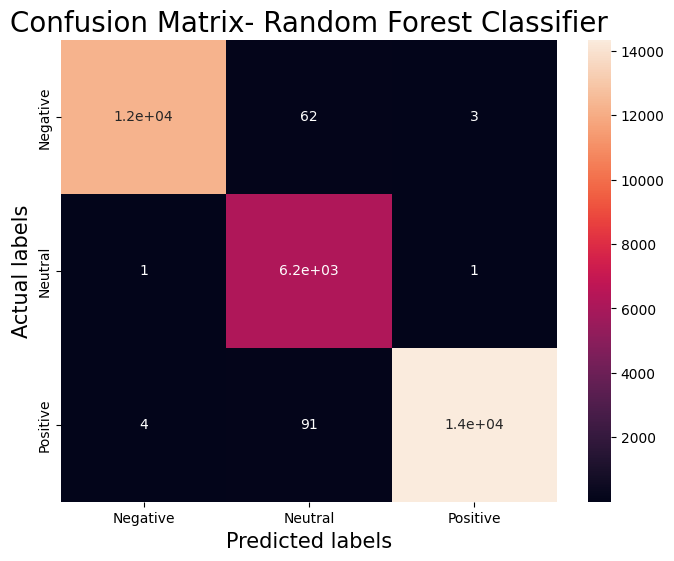

In [ ]:
# Confusion Matrix
cf4a = confusion_matrix(y_train, y_pred_rf_train)
print(cf4a)


ax= plt.subplot()
sns.heatmap(cf4a, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix- Random Forest Classifier', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Observation :**

This model gives an accuracy score of 73.57% which implies that our model is performing well.

#**5. K-NN with TF/IDF Vectoriser**

In [ ]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_cv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [ ]:
#predicted values
pred_knn_cv = knn_cv.predict(X_test)

In [ ]:
pred_knn_cv

array([-1,  0, -1, ..., -1, -1, -1])

In [ ]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

Accuracy : 0.41545189504373176


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

              precision    recall  f1-score   support

          -1       0.41      0.94      0.57      3080
           0       0.39      0.23      0.29      1543
           1       0.85      0.05      0.09      3609

    accuracy                           0.42      8232
   macro avg       0.55      0.41      0.31      8232
weighted avg       0.60      0.42      0.30      8232



[[2904  161   15]
 [1176  353   14]
 [3059  387  163]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

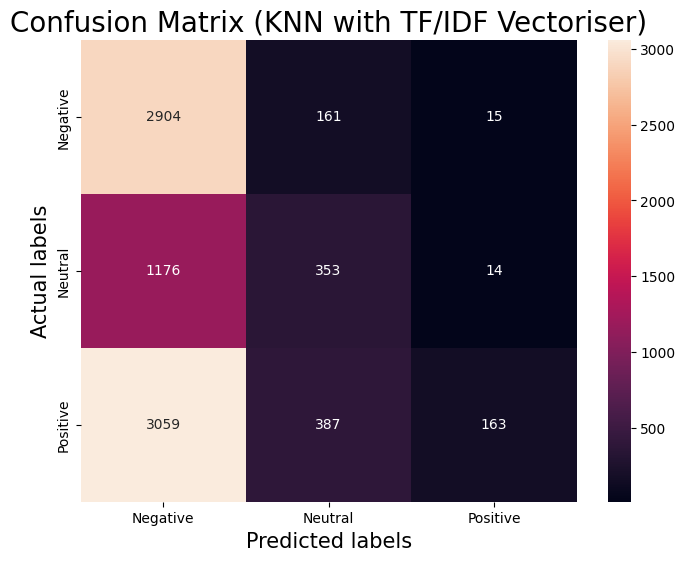

In [ ]:
#Plotting Confussion matrix
cf5a= (confusion_matrix(y_test,pred_knn_cv))
print(cf5a)

ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with TF/IDF Vectoriser)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Observation :**

This model gives an accuracy score of 41.54% which implies that our model is performing poorly.

#**Accuracy Score for Test Data of all the models**

In [ ]:
#Test data

from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Accuracy for Count Vectroiser", "Accuracy for TF/IDF Vactoriser"])
test.add_row(['1','LogisticRegression Classifier','79.32',"78.96"])
test.add_row(['2','DecisionTree Classifier','69.14',"63.62"])
test.add_row(['3','XGBoost Classifier','77.76',"76.22"])
test.add_row(['4','RandomForest Classifier','75.92',"73.57"])
test.add_row(['5','K-NN Classifeir','42.66',"41.54"])
print(test)

+-------+-------------------------------+-------------------------------+--------------------------------+
| SL NO |           MODEL_NAME          | Accuracy for Count Vectroiser | Accuracy for TF/IDF Vactoriser |
+-------+-------------------------------+-------------------------------+--------------------------------+
|   1   | LogisticRegression Classifier |             79.32             |             78.96              |
|   2   |    DecisionTree Classifier    |             69.14             |             63.62              |
|   3   |       XGBoost Classifier      |             77.76             |             76.22              |
|   4   |    RandomForest Classifier    |             75.92             |             73.57              |
|   5   |        K-NN Classifeir        |             42.66             |             41.54              |
+-------+-------------------------------+-------------------------------+--------------------------------+


#**CONCLUSIONS**


---
#**On EDA**
* Original dataset contains 6 columns and 41157 rows.

* ‘Location’ column contains approx. 20.87% of Null values.
* The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.
* In order to analyse the data we required only the following columns "OriginalTweet", "Sentiment", "Location", "TweetAt".
* There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive. So, we merged Extremely Positive with positive and Extremely Negative with Negative. And use encoding with value ‘-1’ for negative, ‘0’ for neutral and ‘1’ for positive.
* All tweets data collected between months of March and April 2020 and of around 30 days.
* Most of the tweets came from London followed by U.S.
* Among top 10 mentions in tweets realDonaldTrump was the top mentioned name and "#coronavirus" was most trendiest hashtag that was trending during that period.

#**On Model Training**

1. We applied 5 different machine learing models namely, Logistic Regression with Grid Search CV, Desision Tree Classifier, XG Boost, RandomForest with GridSearchCV and KNN for both Count Vector And TF IDF Vectorisation techniques.
2. All the models are performing better with Count vectoriser compared to TF/IDF vectoriser.
3. We conclude that the machine is generating best results for Logistic Regression with Grid Search CV model with and Accuracy score of 79.32% and 78.96% respectively for Count vector and TF/idf Vector, followed by XGBoost and RandomForest. K-NN seems to be performing the worst among all the models.
4. Also, we observed that no overfitting is seen for the data, and we can deploy this model.
5. The sentiments of future tweets can be easily predicted using this model.